In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----------------------

## 1 Pengumpulan dan Persiapan Data:

------------------------

In [168]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [169]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Observasi**:

1. **customerID**: ID unik untuk setiap pelanggan.
2. **gender**: Jenis kelamin pelanggan (Male/Female).
3. **SeniorCitizen**: Status warga senior pelanggan; nilai `1` menunjukkan pelanggan adalah warga senior, dan `0` berarti bukan warga senior.
4. **Partner**: Apakah pelanggan memiliki pasangan atau tidak (Yes/No).
5. **Dependents**: Apakah pelanggan memiliki tanggungan (anak atau orang lain yang diasuh) atau tidak (Yes/No).
6. **tenure**: Jumlah bulan pelanggan telah berlangganan.
7. **PhoneService**: Apakah pelanggan memiliki layanan telepon atau tidak (Yes/No).
8. **MultipleLines**: Apakah pelanggan memiliki lebih dari satu saluran telepon (No/Yes/No phone service).
9. **InternetService**: Jenis layanan internet pelanggan (DSL, Fiber optic, atau No internet service).
10. **OnlineSecurity**: Apakah pelanggan memiliki layanan keamanan online (Yes/No/No internet service).
11. **OnlineBackup**: Apakah pelanggan memiliki layanan cadangan data online (Yes/No/No internet service).
12. **DeviceProtection**: Apakah pelanggan memiliki perlindungan perangkat (Yes/No/No internet service).
13. **TechSupport**: Apakah pelanggan memiliki dukungan teknis (Yes/No/No internet service).
14. **StreamingTV**: Apakah pelanggan memiliki layanan streaming TV (Yes/No/No internet service).
15. **StreamingMovies**: Apakah pelanggan memiliki layanan streaming film (Yes/No/No internet service).
16. **Contract**: Jenis kontrak pelanggan (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Apakah pelanggan memiliki tagihan tanpa kertas atau tidak (Yes/No).
18. **PaymentMethod**: Metode pembayaran yang digunakan pelanggan (Electronic check, Mailed check, Bank transfer, Credit card).
19. **MonthlyCharges**: Jumlah yang dibayar pelanggan setiap bulan.
20. **TotalCharges**: Total biaya yang dibayar pelanggan sampai saat ini.
21. **Churn**: Apakah pelanggan menghentikan langganan (Yes/No).


-----------------

## 2 Pembersihan Data:
Lakukan proses pembersihan data standar yang mencakup penanganan nilai yang hilang dan nilai duplikat. Pastikan dataset bersih sebelum melakukan analisis lebih lanjut.


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observasi**:
1. Data mengandung 21 kolom dengan 7043 baris.
2. Tidak terdapat nilai yang hilang pada setiap kolom, terlihat dari jumlah Non-Null Count yang sama dengan jumlah baris data (7043).
3. Beberapa tipe data kolom perlu diperhatikan:
   - Kolom `TotalCharges` memiliki tipe `object`, padahal seharusnya bertipe numerik (`float64` atau `int64`) jika nilai-nilai di dalamnya berupa angka.
   - Tipe data lainnya tampak sudah sesuai, seperti `int64` untuk kolom `SeniorCitizen` dan `tenure`, serta `float64` untuk kolom `MonthlyCharges`.

---------------------------------------

In [171]:
# ambil value pada totalC yang selain space ' '
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [172]:
# ubah type nya menjadi float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Observasi**:
1. TotalCharges berhasil diubah menjadi float

-------------------------------

In [174]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Observasi**:
1. Data mengandung 21 kolom dengan 7043 baris.
2. Tidak ada kolom yang memiliki nilai yang hilang, terlihat dari jumlah nilai `0` pada setiap kolom. Dengan demikian, tidak perlu melakukan penghapusan nilai yang hilang.

---------------------------

In [175]:
df.duplicated().sum()

0

**Observasi**:
1. Tidak terdapat baris duplikat pada data, karena hasil menunjukkan nilai `0`.
2. Data ini dapat langsung dianalisis lebih lanjut tanpa perlu langkah pembersihan terkait duplikasi data.

---------------------

---------------------

## 3 Analisis Data Eksploratif (EDA):
Lakukan EDA standar dengan interpretasi yang kaya, yang mencakup:
Ringkasan statistik dari kolom.
Analisis univariat, yaitu analisis satu variabel pada suatu waktu.
Analisis multivariat, yaitu analisis yang melibatkan lebih dari satu variabel.


# Data understanding

## Statistical summary

---------------------

In [176]:
# Ambil nama kolom kategorikal sebagai list
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom Kategorikal:", categorical_columns)




Kolom Kategorikal: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [177]:
# Ambil nama kolom numerikal sebagai list
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Kolom Numerikal:", numerical_columns)

Kolom Numerikal: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


----------------------

In [178]:
df[categorical_columns].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [179]:
for col in categorical_columns:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64 

Value counts of gender column
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value counts of Partner column
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value counts of Dependents column
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value counts of PhoneService column
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value counts of MultipleLines column
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value counts of InternetService column
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

Value counts of OnlineSecurity column
OnlineSecurity
No 

## **Observasi**:
 1. **CustomerID**
   - **Jumlah unik**: Setiap `customerID` adalah unik (hanya muncul sekali dalam dataset), yang menunjukkan bahwa data ini berisi informasi tentang pelanggan individu.

 2. **Gender**
   - **Distribusi Gender**: 
     - Terdapat sedikit perbedaan antara jumlah pelanggan laki-laki (`Male`: 3549) dan perempuan (`Female`: 3483), dengan proporsi hampir seimbang. 
     - Ini menunjukkan bahwa pelanggan terbagi hampir merata berdasarkan gender.

 3. **Partner**
   - **Distribusi Partner**:
     - Pelanggan yang tidak memiliki pasangan (`No`: 3639) lebih banyak daripada yang memiliki pasangan (`Yes`: 3393).
     - Namun, perbedaan jumlahnya tidak terlalu besar, menunjukkan bahwa hampir setengah pelanggan memiliki pasangan.

 4. **Dependents**
   - **Distribusi Dependents**:
     - Sebagian besar pelanggan tidak memiliki tanggungan (`No`: 4933), sementara yang memiliki tanggungan (`Yes`: 2099) jauh lebih sedikit.
     - Ini mungkin menunjukkan bahwa mayoritas pelanggan adalah individu tanpa tanggungan (misalnya, anak atau anggota keluarga lainnya).

 5. **PhoneService**
   - **Distribusi PhoneService**:
     - Hampir seluruh pelanggan memiliki layanan telepon (`Yes`: 6352), sedangkan hanya sedikit yang tidak menggunakan layanan telepon (`No`: 680).
     - Ini menunjukkan bahwa sebagian besar pelanggan menggunakan layanan telepon.

 6. **MultipleLines**
   - **Distribusi MultipleLines**:
     - Banyak pelanggan yang tidak menggunakan layanan telepon ganda (`No`: 3385), meskipun ada cukup banyak yang menggunakan layanan telepon ganda (`Yes`: 2967).
     - Ada juga beberapa pelanggan yang tidak memiliki layanan telepon (`No phone service`: 680), yang sesuai dengan nilai pada kolom `PhoneService`.

 7. **InternetService**
   - **Distribusi InternetService**:
     - Mayoritas pelanggan menggunakan internet dengan koneksi `Fiber optic` (3096 pelanggan), diikuti oleh `DSL` (2416 pelanggan), dan sedikit yang tidak menggunakan layanan internet sama sekali (`No`: 1520).
     - Hal ini menunjukkan bahwa koneksi internet fiber optic lebih populer dibandingkan dengan DSL, dan sebagian pelanggan tidak memiliki akses internet.

 8. **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**
   - **Distribusi Layanan Tambahan**:
     - Banyak pelanggan yang tidak menggunakan layanan keamanan online (`No: 3497`), cadangan online (`No: 3087`), perlindungan perangkat (`No: 3094`), dan dukungan teknis (`No: 3472`).
     - Sebagian pelanggan menggunakan layanan-layanan ini, namun secara keseluruhan, mayoritas tidak menggunakan layanan tambahan tersebut.
     - Hal ini mungkin menunjukkan bahwa pelanggan lebih memilih paket dasar tanpa layanan tambahan.

 9. **StreamingTV dan StreamingMovies**
   - **Distribusi Layanan Streaming**:
     - Sebagian besar pelanggan tidak menggunakan layanan streaming TV (`No: 2809`) dan film streaming (`No: 2781`), meskipun ada yang menggunakan layanan ini (`Yes: 2703` untuk TV dan `Yes: 2731` untuk film).
     - Pelanggan yang tidak menggunakan layanan ini lebih banyak dibandingkan yang menggunakannya.

 10. **Contract**
   - **Distribusi Contract**:
     - Mayoritas pelanggan memiliki kontrak bulan-ke-bulan (`Month-to-month: 3875`), sementara jumlah pelanggan dengan kontrak tahunan atau dua tahun lebih sedikit (`One year: 1472`, `Two year: 1685`).
     - Ini menunjukkan bahwa sebagian besar pelanggan lebih memilih fleksibilitas dengan kontrak bulan-ke-bulan.

 11. **PaperlessBilling**
   - **Distribusi PaperlessBilling**:
     - Mayoritas pelanggan menggunakan penagihan tanpa kertas (`Yes: 4168`), yang mungkin mencerminkan preferensi untuk menggunakan tagihan elektronik atau sistem pembayaran yang lebih efisien.
     - Hanya sebagian kecil pelanggan yang masih menggunakan penagihan dengan kertas (`No: 2864`).

 12. **PaymentMethod**
   - **Distribusi PaymentMethod**:
     - Pembayaran menggunakan `Electronic check` adalah yang paling banyak digunakan (2365 pelanggan), diikuti oleh `Mailed check` (1604 pelanggan), `Bank transfer (automatic)` (1542 pelanggan), dan `Credit card (automatic)` (1521 pelanggan).
     - Ini menunjukkan bahwa mayoritas pelanggan lebih memilih menggunakan cek elektronik sebagai metode pembayaran.

 13. **Churn**
   - **Distribusi Churn**:
     - Sebagian besar pelanggan tetap menggunakan layanan (`No: 5163`), sementara jumlah pelanggan yang berhenti (`Yes: 1869`) lebih sedikit.
     - Hal ini menunjukkan tingkat retensi pelanggan yang lebih tinggi, namun tetap ada proporsi pelanggan yang churn.

 **Kesimpulan Umum:**
- Data menunjukkan bahwa sebagian besar pelanggan adalah individu tanpa pasangan, tanpa tanggungan, dan menggunakan layanan telepon serta internet.
- Pelanggan lebih cenderung memilih kontrak bulan-ke-bulan daripada kontrak tahunan atau dua tahunan.
- Sebagian besar pelanggan menggunakan layanan tanpa kertas dan lebih suka menggunakan cek elektronik sebagai metode pembayaran.
- Meskipun mayoritas pelanggan tidak berhenti (churn), terdapat proporsi yang cukup signifikan yang churn, yang mungkin perlu dianalisis lebih lanjut untuk memahami faktor penyebabnya.




------------------------------

In [180]:
df[numerical_columns].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## **Observasi**:

1. **SeniorCitizen**:
   - Rata-rata pelanggan yang merupakan warga senior adalah 16.24% (`mean` = 0.162), dengan nilai maksimum `1` (artinya ada pelanggan warga senior) dan minimum `0` (artinya bukan warga senior).
   - Sebagian besar pelanggan bukan warga senior, terlihat dari nilai kuartil 25%, 50%, dan 75% yang semuanya `0`.

2. **tenure** (jumlah bulan berlangganan):
   - Rata-rata masa berlangganan pelanggan adalah sekitar 32 bulan, dengan standar deviasi sekitar 24.55 bulan, menunjukkan variabilitas yang cukup besar dalam masa berlangganan pelanggan.
   - Nilai minimum masa berlangganan adalah 1 bulan, dan maksimum adalah 72 bulan (6 tahun).
   - 50% dari pelanggan memiliki masa berlangganan 29 bulan atau kurang (median).
   - Pelanggan pada kuartil atas (75%) memiliki masa berlangganan 55 bulan atau lebih, yang mengindikasikan beberapa pelanggan tetap untuk waktu yang cukup lama.

3. **MonthlyCharges** (biaya bulanan):
   - Rata-rata biaya bulanan yang dibayar pelanggan adalah sekitar 64.80, dengan standar deviasi 30.09.
   - Nilai minimum untuk biaya bulanan adalah 18.25, dan maksimum adalah 118.75.
   - 50% dari pelanggan memiliki biaya bulanan sebesar 70.35 atau kurang.
   - Pada kuartil atas (75%), pelanggan membayar sekitar 89.86 atau lebih, menunjukkan bahwa biaya bulanan dapat bervariasi tergantung pada layanan yang digunakan.

4. **TotalCharges** (total biaya yang dibayarkan pelanggan hingga saat ini):
   - Rata-rata total biaya yang dibayarkan pelanggan adalah sekitar 2283.30, dengan standar deviasi 2266.77, menunjukkan adanya variasi yang besar pada total biaya di antara pelanggan.
   - Nilai minimum total biaya adalah 18.80, sementara nilai maksimum adalah 8684.80.
   - 50% dari pelanggan memiliki total biaya 1397.48 atau kurang, sedangkan pelanggan di kuartil atas (75%) memiliki total biaya sebesar 3794.74 atau lebih.


-----------------------

# Univariate Analysis

## Boxplot to detect outliers

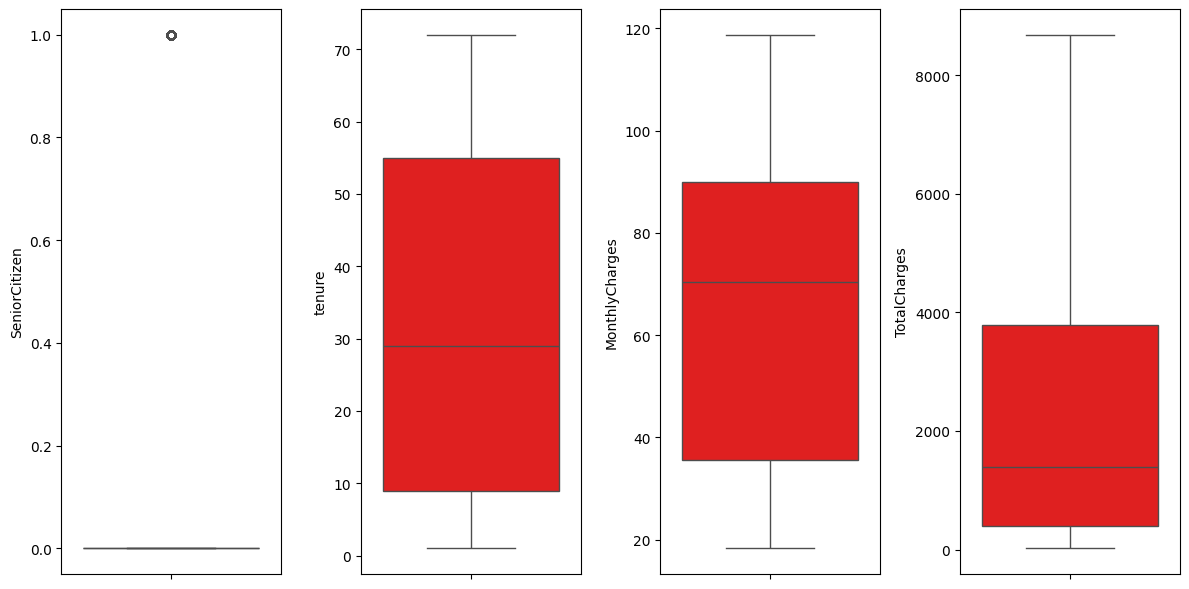

In [181]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical_columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

In [182]:
sc_senior = (df['SeniorCitizen'] == 1)
sc_senior.sum()

1142

In [183]:
outlier = df['SeniorCitizen'].max()

df[df['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


## **observasi** 

1. **SeniorCitizen**:
   - Sebagian besar data berada di 0, yang mengindikasikan mayoritas pelanggan bukanlah "SeniorCitizen".
   - Hanya sebagian kecil data berada di nilai 1, menunjukkan bahwa hanya sedikit pelanggan yang termasuk dalam kategori senior.

2. **Tenure**:
   - Distribusi tenure menunjukkan pola bimodal, dengan puncak di sekitar nilai rendah (0-10 bulan) dan nilai tinggi (lebih dari 60 bulan).
   - Ini mungkin menunjukkan bahwa banyak pelanggan yang baru berlangganan atau telah lama berlangganan, dengan lebih sedikit yang berada di masa tengah (20-40 bulan).

3. **MonthlyCharges**:
   - MonthlyCharges memiliki distribusi multimodal, dengan puncak pertama pada sekitar 20 dan puncak lain sekitar 70-90.
   - Hal ini bisa menandakan adanya beberapa kelompok pelanggan dengan tingkat biaya bulanan yang berbeda, mungkin terkait dengan jenis layanan atau paket yang mereka pilih.

4. **TotalCharges**:
   - Distribusi TotalCharges tampak skewed (condong) ke kanan, dengan sebagian besar data di rentang rendah.
   - Mayoritas pelanggan memiliki TotalCharges yang rendah (di bawah 2000), sementara hanya sedikit yang mencapai angka tinggi mendekati 8000.

Dari keseluruhan observasi, pola ini menunjukkan bahwa sebagian besar pelanggan bukanlah senior, memiliki biaya bulanan yang bervariasi, dan kebanyakan memiliki jumlah biaya total yang lebih rendah, yang mungkin menunjukkan banyak pelanggan baru atau langganan jangka pendek.

--------------

## KDE plot for knowing the distribution form

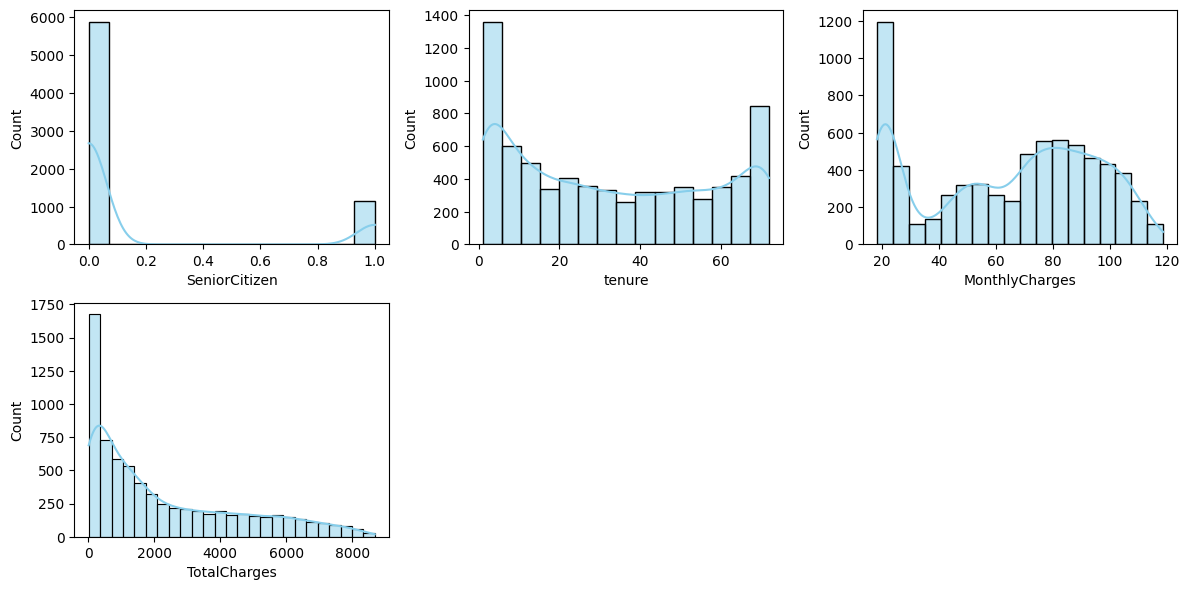

In [184]:
plt.figure(figsize=(12,6))

features = numerical_columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

## **observasi** 

1. **SeniorCitizen**:
   - Sebagian besar data berada di 0, yang mengindikasikan mayoritas pelanggan bukanlah "SeniorCitizen".
   - Hanya sebagian kecil data berada di nilai 1, menunjukkan bahwa hanya sedikit pelanggan yang termasuk dalam kategori senior.

2. **Tenure**:
   - Distribusi tenure menunjukkan pola bimodal, dengan puncak di sekitar nilai rendah (0-10 bulan) dan nilai tinggi (lebih dari 60 bulan).
   - Ini mungkin menunjukkan bahwa banyak pelanggan yang baru berlangganan atau telah lama berlangganan, dengan lebih sedikit yang berada di masa tengah (20-40 bulan).

3. **MonthlyCharges**:
   - MonthlyCharges memiliki distribusi multimodal, dengan puncak pertama pada sekitar 20 dan puncak lain sekitar 70-90.
   - Hal ini bisa menandakan adanya beberapa kelompok pelanggan dengan tingkat biaya bulanan yang berbeda, mungkin terkait dengan jenis layanan atau paket yang mereka pilih.

4. **TotalCharges**:
   - Distribusi TotalCharges tampak skewed (condong) ke kanan, dengan sebagian besar data di rentang rendah.
   - Mayoritas pelanggan memiliki TotalCharges yang rendah (di bawah 2000), sementara hanya sedikit yang mencapai angka tinggi mendekati 8000.

Dari keseluruhan observasi, pola ini menunjukkan bahwa sebagian besar pelanggan bukanlah senior, memiliki biaya bulanan yang bervariasi, dan kebanyakan memiliki jumlah biaya total yang lebih rendah, yang mungkin menunjukkan banyak pelanggan baru atau langganan jangka pendek.

---------------------------------

In [185]:
# df['InternetService'].describe()

## Kategorikal

C:\Users\annas\AppData\Local\Temp\ipykernel_8216\2531852666.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotasi label pada sumbu X jika diperlukan
C:\Users\annas\AppData\Local\Temp\ipykernel_8216\2531852666.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotasi label pada sumbu X jika diperlukan
C:\Users\annas\AppData\Local\Temp\ipykernel_8216\2531852666.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotasi label pada sumbu X jika diperlukan
C:\Users\annas\AppData\Local\Temp\ipykernel_8216\2531852666.py:19: UserWarning: set_ticklabels() should only be 

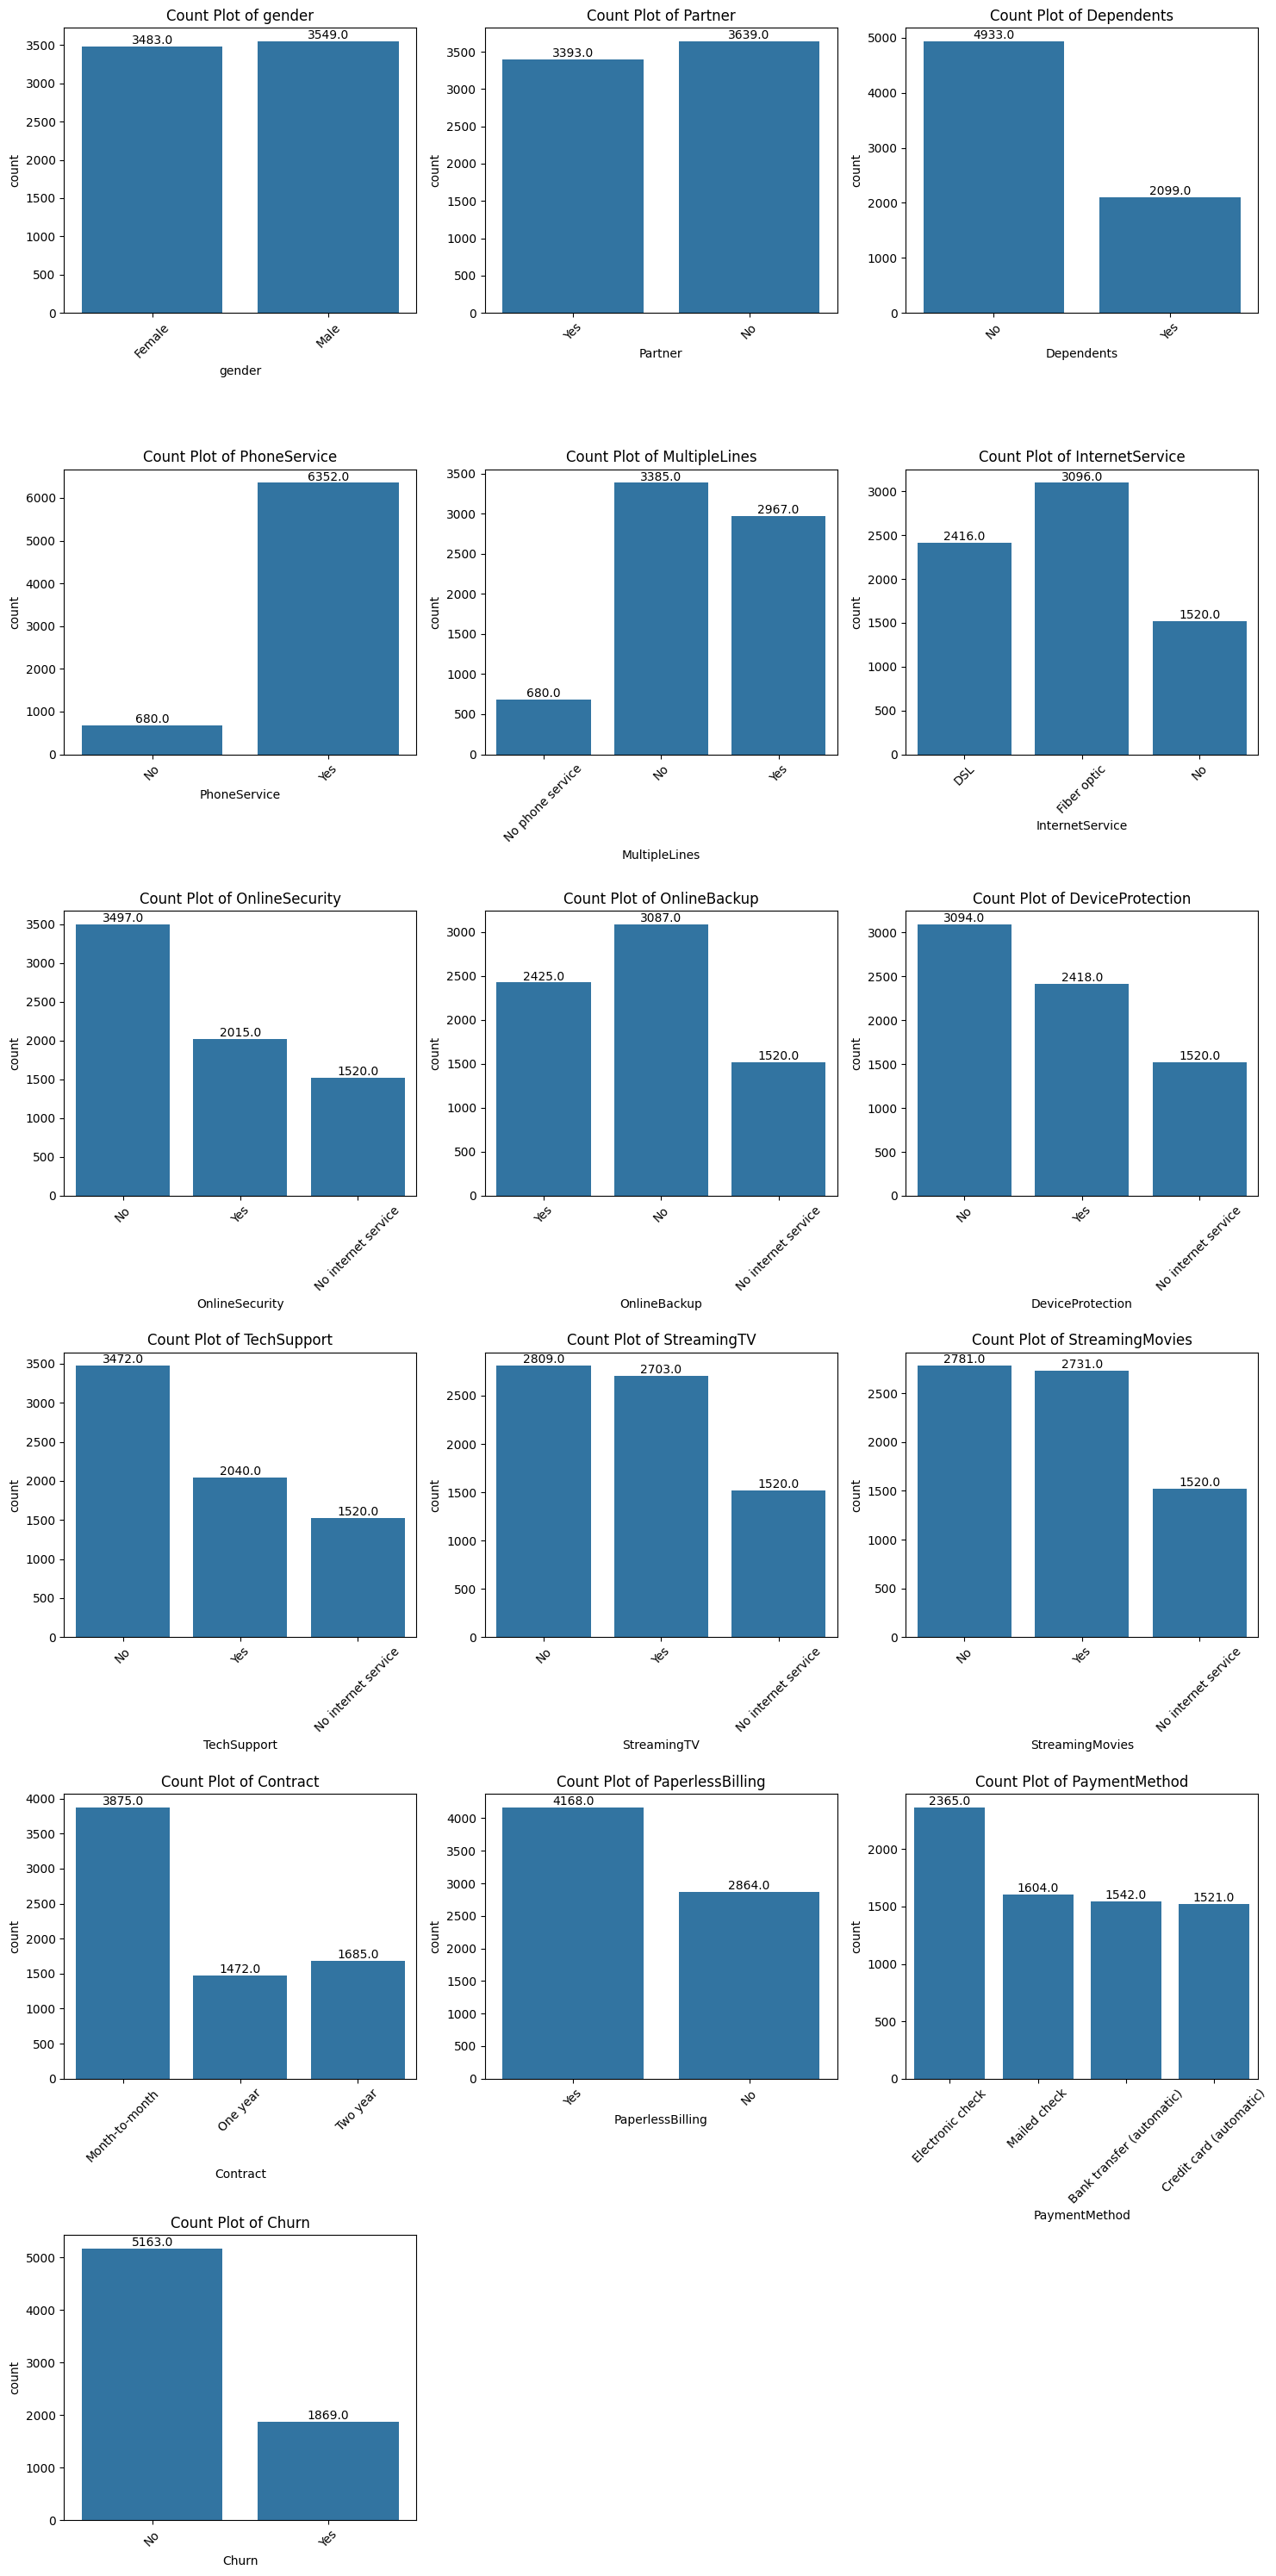

In [186]:


# Menghapus 'customerID' dari list kolom kategorikal
categorical_columns = [col for col in categorical_columns if col != 'customerID']

# Menentukan jumlah kolom dan baris untuk grid plot
n_cols = 3  # Menentukan jumlah kolom
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Menentukan jumlah baris secara otomatis

# Membuat figure untuk beberapa subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Mengatur ukuran figure

# Flatten axes agar mudah diakses
axes = axes.flatten()

# Membuat count plot untuk setiap kolom kategorikal
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotasi label pada sumbu X jika diperlukan
    
    # Menambahkan count labels ke setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Menghapus subplot yang tidak digunakan jika jumlah kolom lebih banyak dari plot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()


## **observasi**

1. **Gender**:
   - Jumlah pelanggan antara perempuan dan laki-laki hampir seimbang.

2. **Partner**:
   - Lebih banyak pelanggan yang memiliki pasangan dibandingkan yang tidak.

3. **Dependents**:
   - Sebagian besar pelanggan tidak memiliki tanggungan.

4. **PhoneService**:
   - Hampir semua pelanggan memiliki layanan telepon, dengan sedikit yang tidak memilikinya.

5. **MultipleLines**:
   - Mayoritas pelanggan memiliki layanan telepon tanpa multiple lines, sedangkan sebagian lainnya memiliki multiple lines atau tidak memiliki layanan telepon sama sekali.

6. **InternetService**:
   - Layanan internet yang paling populer adalah fiber optic, diikuti oleh DSL, dan sebagian pelanggan tidak memiliki layanan internet sama sekali.

7. **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**:
   - Banyak pelanggan yang tidak memiliki layanan keamanan online, backup online, proteksi perangkat, atau dukungan teknis.
   - Beberapa pelanggan memiliki layanan ini, dan sebagian besar lainnya yang tidak memiliki internet tidak bisa mengakses layanan ini.

8. **StreamingTV dan StreamingMovies**:
   - Jumlah pelanggan yang menggunakan layanan streaming TV dan streaming film hampir seimbang antara yang memiliki dan yang tidak.
   - Sebagian besar pelanggan yang tidak memiliki layanan internet juga tidak memiliki akses ke layanan streaming.

9. **Contract**:
   - Sebagian besar pelanggan berada dalam kontrak bulanan, sementara sisanya memiliki kontrak satu tahun atau dua tahun.

10. **PaperlessBilling**:
    - Lebih banyak pelanggan yang menggunakan tagihan tanpa kertas (paperless billing) dibandingkan yang tidak.

11. **PaymentMethod**:
    - Metode pembayaran yang paling populer adalah electronic check, diikuti oleh mailed check, transfer bank otomatis, dan kartu kredit otomatis.

12. **Churn**:
    - Mayoritas pelanggan tetap setia (tidak churn), sedangkan sebagian lebih kecil memutuskan untuk churn (berhenti berlangganan).

Secara keseluruhan, data ini menunjukkan variasi dalam preferensi layanan dan metode pembayaran pelanggan, dengan beberapa layanan (seperti internet fiber optic dan kontrak bulanan) lebih populer. Churn rate juga tampaknya tidak terlalu tinggi, dengan sebagian besar pelanggan tetap bertahan dalam layanan.

----------------------------

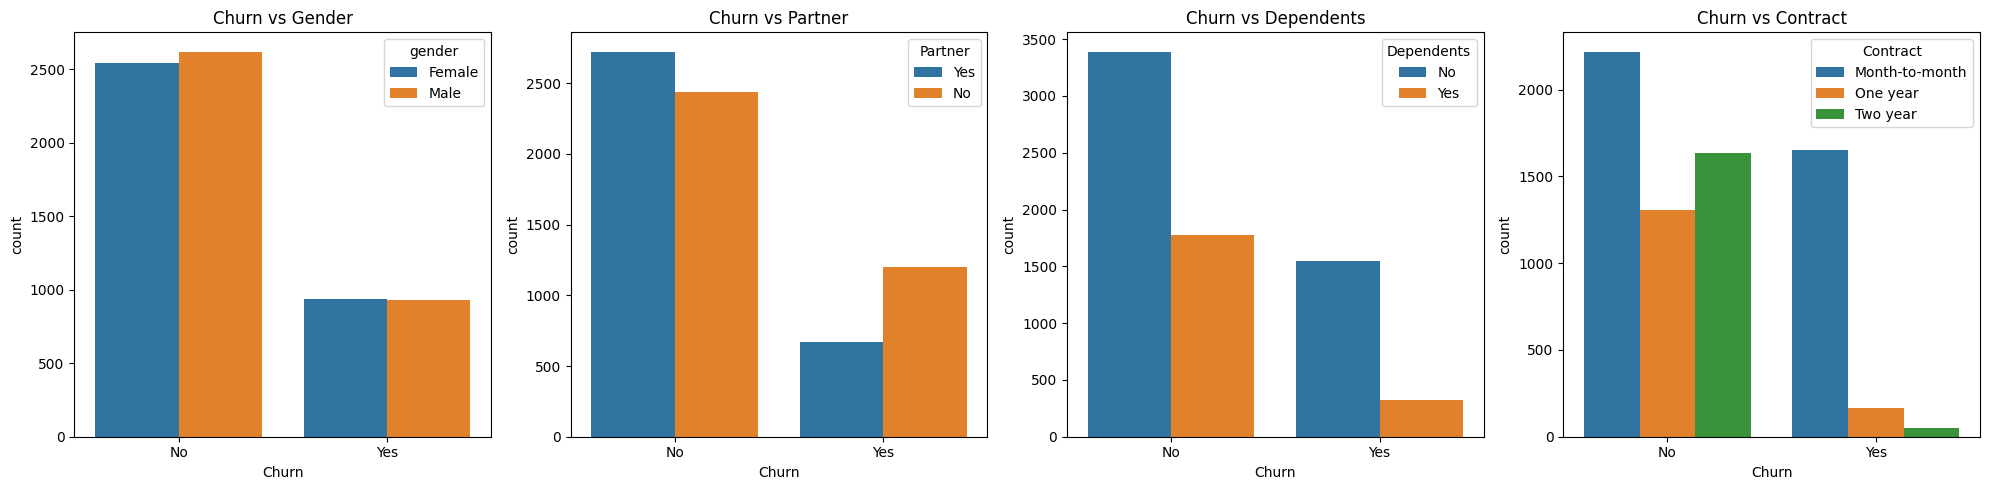

In [187]:
  

# Menyusun count plots dalam satu baris
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 baris, 4 kolom

# Churn vs Gender
sns.countplot(data=df, x='Churn', hue='gender', ax=axes[0])
axes[0].set_title('Churn vs Gender')

# Churn vs Partner
sns.countplot(data=df, x='Churn', hue='Partner', ax=axes[1])
axes[1].set_title('Churn vs Partner')

# Churn vs Dependents
sns.countplot(data=df, x='Churn', hue='Dependents', ax=axes[2])
axes[2].set_title('Churn vs Dependents')

# Churn vs Contract
sns.countplot(data=df, x='Churn', hue='Contract', ax=axes[3])
axes[3].set_title('Churn vs Contract')

# Menampilkan plot
plt.tight_layout()
plt.show()




### Observasi: Churn vs Gender, Partner, Dependents, Contract
1. **Churn vs Gender**: Perbandingan churn antara laki-laki dan perempuan hampir seimbang. Tidak ada perbedaan signifikan dalam hal jumlah pelanggan yang churn berdasarkan gender.

2. **Churn vs Partner**: Pelanggan yang memiliki pasangan cenderung memiliki tingkat churn lebih rendah dibandingkan yang tidak memiliki pasangan. Ini menunjukkan bahwa status pasangan mungkin mempengaruhi loyalitas pelanggan.

3. **Churn vs Dependents**: Pelanggan yang memiliki tanggungan cenderung lebih sedikit mengalami churn dibandingkan pelanggan yang tidak memiliki tanggungan. Hal ini bisa menandakan bahwa pelanggan dengan tanggungan lebih cenderung untuk mempertahankan layanan.

4. **Churn vs Contract**: Pelanggan dengan kontrak bulanan memiliki tingkat churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak tahunan atau dua tahunan. Ini menunjukkan bahwa jenis kontrak berpengaruh besar terhadap churn, dengan kontrak jangka panjang membantu menurunkan churn.



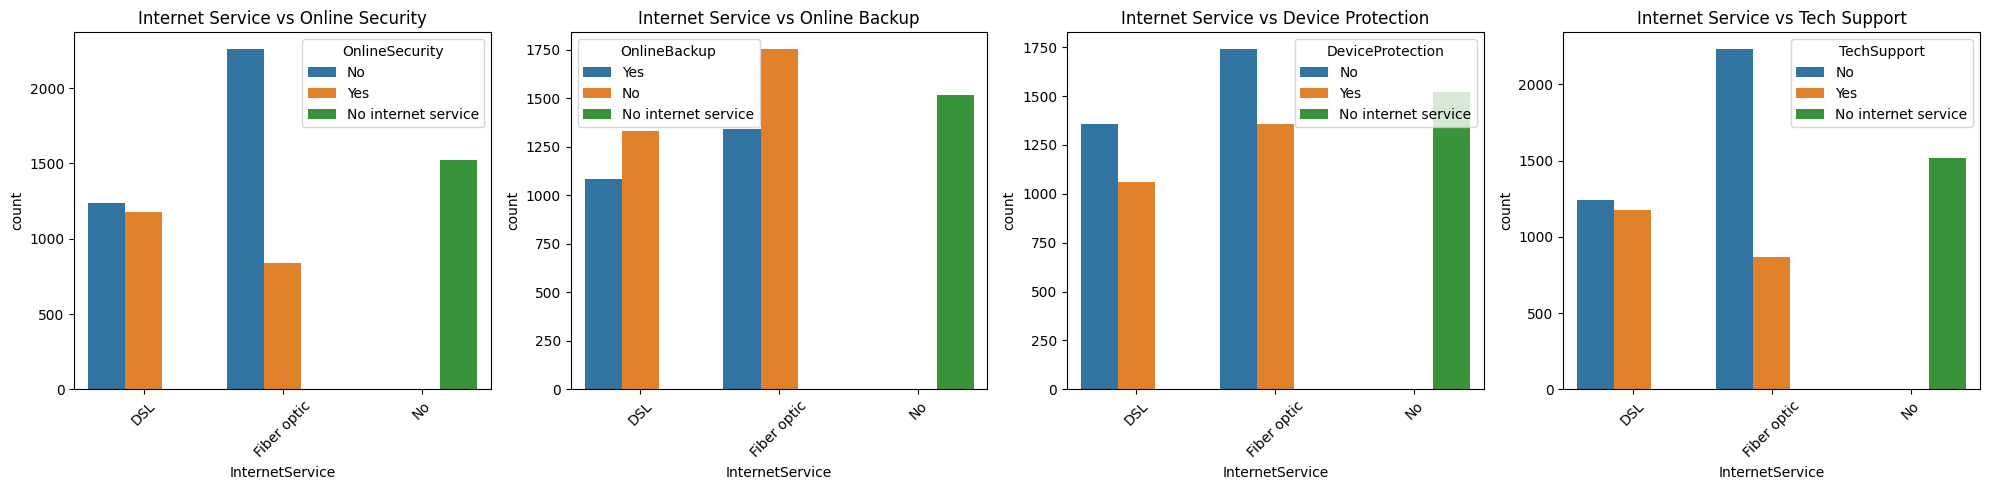

In [188]:


# Menyusun count plots dalam satu baris
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 baris, 4 kolom

# Count plot untuk 'InternetService vs OnlineSecurity'
sns.countplot(data=df, x='InternetService', hue='OnlineSecurity', ax=axes[0])
axes[0].set_title('Internet Service vs Online Security')

# Count plot untuk 'InternetService vs OnlineBackup'
sns.countplot(data=df, x='InternetService', hue='OnlineBackup', ax=axes[1])
axes[1].set_title('Internet Service vs Online Backup')

# Count plot untuk 'InternetService vs DeviceProtection'
sns.countplot(data=df, x='InternetService', hue='DeviceProtection', ax=axes[2])
axes[2].set_title('Internet Service vs Device Protection')

# Count plot untuk 'InternetService vs TechSupport'
sns.countplot(data=df, x='InternetService', hue='TechSupport', ax=axes[3])
axes[3].set_title('Internet Service vs Tech Support')

# Menyesuaikan label sumbu X agar tidak turun
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotasi label 45 derajat

# Menampilkan plot
plt.tight_layout()
plt.show()


### Observasi: Internet Service vs Online Security, Online Backup, Device Protection, Tech Support
1. **Internet Service vs Online Security**: Pelanggan dengan layanan internet "Fiber optic" memiliki tingkat kepemilikan online security yang lebih rendah dibandingkan pelanggan dengan "DSL". Pelanggan yang tidak memiliki internet service sebagian besar tidak memiliki layanan keamanan online.

2. **Internet Service vs Online Backup**: Untuk pelanggan "DSL", jumlah yang memiliki backup online seimbang dengan yang tidak. Sementara itu, pelanggan "Fiber optic" lebih banyak yang tidak memiliki online backup dibandingkan yang memiliki.

3. **Internet Service vs Device Protection**: Pelanggan "Fiber optic" lebih banyak yang tidak memiliki proteksi perangkat dibandingkan yang memiliki, sementara pelanggan "DSL" memiliki distribusi yang lebih merata antara yang memiliki dan tidak memiliki proteksi perangkat.

4. **Internet Service vs Tech Support**: Pelanggan "Fiber optic" lebih banyak yang tidak memiliki dukungan teknis dibandingkan yang memiliki, sementara pelanggan "DSL" cenderung memiliki distribusi yang lebih merata antara yang memiliki dan tidak memiliki dukungan teknis.

Secara keseluruhan, observasi ini menunjukkan bahwa jenis layanan internet dan jenis kontrak mempengaruhi keputusan pelanggan untuk tetap bertahan atau meninggalkan layanan (churn), serta preferensi mereka terhadap layanan tambahan seperti online security, backup, dan dukungan teknis.

--------------------

<Axes: >

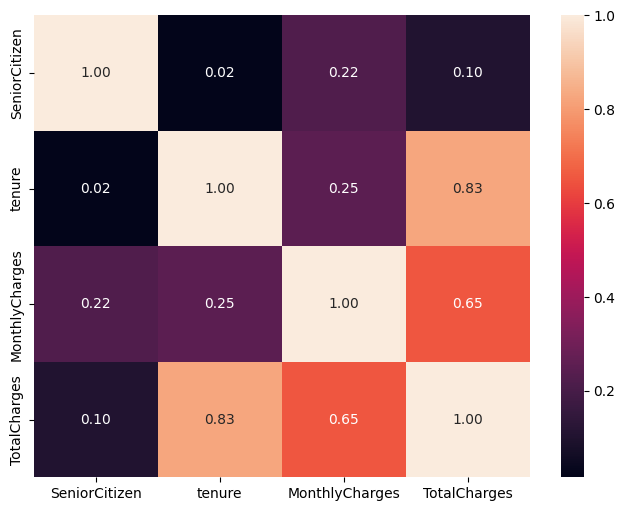

In [189]:
plt.figure(figsize=(8,6))
correlation = df[numerical_columns].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## **Observasi**

1. **Tenure dan TotalCharges**: Memiliki korelasi positif yang cukup tinggi sebesar 0.83, yang menunjukkan bahwa semakin lama pelanggan berlangganan (`tenure`), semakin besar nilai `TotalCharges` yang telah dibayar. Ini logis karena pelanggan yang bertahan lebih lama tentu akan memiliki total pembayaran yang lebih besar.

2. **MonthlyCharges dan TotalCharges**: Memiliki korelasi positif sebesar 0.65, yang menunjukkan bahwa pelanggan dengan biaya bulanan yang lebih tinggi cenderung memiliki total biaya yang lebih tinggi pula. Hal ini juga wajar, mengingat biaya bulanan yang tinggi akan berkontribusi pada total biaya yang lebih tinggi.

3. **Tenure dan MonthlyCharges**: Korelasi antara `tenure` dan `MonthlyCharges` sebesar 0.25, menunjukkan hubungan yang positif namun lemah. Ini menandakan bahwa lama pelanggan berlangganan tidak terlalu berhubungan langsung dengan biaya bulanan yang mereka bayar.

4. **SeniorCitizen dengan Variabel Lain**: `SeniorCitizen` memiliki korelasi yang sangat rendah dengan variabel lainnya (maksimum 0.22 dengan `MonthlyCharges`), yang menunjukkan bahwa status apakah pelanggan adalah warga lanjut usia atau bukan tidak memiliki hubungan kuat dengan biaya bulanan, total biaya, ataupun lama berlangganan.

Secara keseluruhan, observasi ini menunjukkan bahwa variabel `tenure` dan `MonthlyCharges` memiliki pengaruh yang signifikan terhadap `TotalCharges`, namun `SeniorCitizen` tidak terlalu berpengaruh pada variabel-variabel lainnya.

--------



1. **Bagaimana variabel-variabel numerik berhubungan dengan status churn pelanggan?**
   - Apakah ada pola tertentu pada pelanggan yang churn dibandingkan dengan yang tidak churn, berdasarkan variabel-variabel seperti `tenure`, `MonthlyCharges`, dan `TotalCharges`?
   
2. **Apakah ada faktor spesifik yang mempengaruhi churn pelanggan?**
   - Misalnya, apakah pelanggan dengan `MonthlyCharges` yang tinggi cenderung lebih sering churn dibandingkan pelanggan dengan `MonthlyCharges` yang lebih rendah?
   - Apakah pelanggan dengan `tenure` yang lebih lama cenderung tetap berlangganan, sementara pelanggan dengan `tenure` singkat lebih sering churn?

3. **Apakah pelanggan senior (`SeniorCitizen`) memiliki kecenderungan yang berbeda terkait churn?**
   - Apakah ada perbedaan pola churn antara pelanggan senior dan non-senior?
   
4. **Bagaimana `TotalCharges` terkait dengan churn?**
   - Apakah pelanggan dengan `TotalCharges` yang lebih tinggi atau lebih rendah lebih mungkin churn?


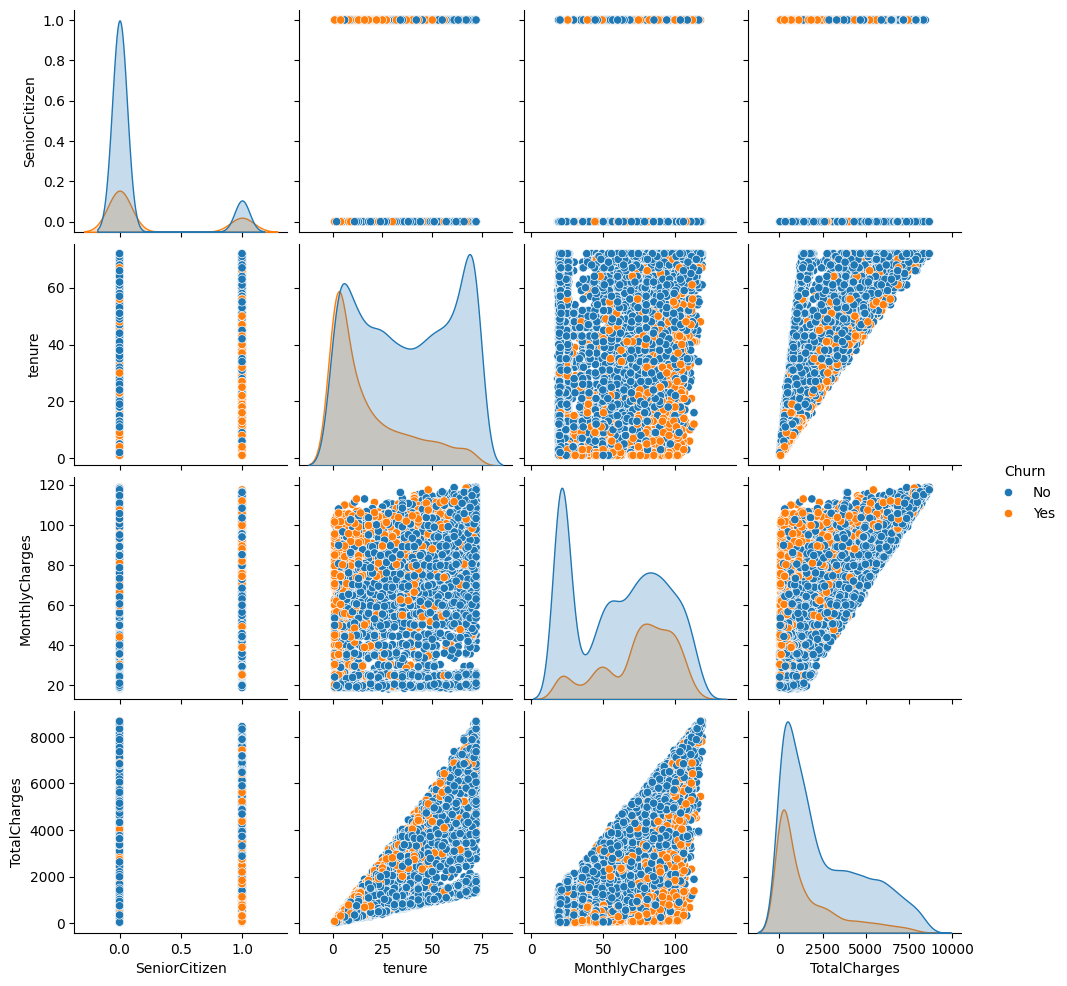

In [190]:

sns.pairplot(df, hue='Churn', vars=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])


## **Observasi**

1. **Hubungan variabel numerik dengan status churn pelanggan:**
   - Variabel `tenure` menunjukkan bahwa pelanggan dengan durasi berlangganan (tenure) yang singkat cenderung lebih sering churn dibandingkan dengan pelanggan yang memiliki tenure lebih lama. Hal ini terlihat dari distribusi churn yang lebih padat pada nilai tenure rendah.
   - Variabel `MonthlyCharges` memiliki distribusi yang berbeda antara pelanggan churn dan yang tidak. Pelanggan churn cenderung memiliki `MonthlyCharges` yang lebih tinggi dibandingkan dengan pelanggan yang tidak churn.

2. **Faktor spesifik yang mempengaruhi churn:**
   - Pelanggan dengan `MonthlyCharges` yang tinggi cenderung lebih sering churn. Hal ini terlihat dari densitas churn yang tinggi pada rentang MonthlyCharges yang lebih tinggi.
   - Pelanggan dengan `tenure` yang lebih lama tampaknya memiliki kecenderungan untuk tidak churn, sedangkan pelanggan dengan tenure singkat lebih cenderung churn. Ini mengindikasikan bahwa pelanggan yang telah lama berlangganan lebih setia.

3. **Kecenderungan churn pelanggan senior (`SeniorCitizen`):**
   - Pada plot untuk variabel `SeniorCitizen`, tidak ada pola yang sangat mencolok antara pelanggan senior dan non-senior terkait churn. Namun, tampaknya sebagian kecil pelanggan senior berada di kelompok churn.

4. **Hubungan `TotalCharges` dengan churn:**
   - Pelanggan dengan `TotalCharges` yang rendah cenderung lebih sering churn. Ini mungkin terkait dengan durasi pelanggan dalam berlangganan (`tenure`), di mana pelanggan dengan `TotalCharges` rendah biasanya memiliki tenure yang lebih singkat. Sebaliknya, pelanggan dengan TotalCharges tinggi cenderung bertahan lebih lama.

Secara keseluruhan, faktor yang tampaknya berpengaruh pada churn adalah `tenure` dan `MonthlyCharges`. Pelanggan dengan durasi berlangganan singkat dan biaya bulanan tinggi lebih cenderung untuk churn, sementara pelanggan dengan tenure lama lebih setia.

---------------

## 4 Eksplorasi Mendalam:
Ajukan minimal dua pertanyaan eksploratif yang ingin Anda jawab melalui data.
Lakukan analisis mendalam untuk menjawab pertanyaan-pertanyaan tersebut, dengan setidaknya satu pertanyaan melibatkan agregasi berkelompok (group-by aggregation).


In [191]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dari data yang ada, berikut adalah beberapa pertanyaan eksploratif yang bisa dijawab:**

1. **Apakah terdapat perbedaan churn berdasarkan jenis kelamin pelanggan?**
   - Tujuan: Mengetahui apakah gender berpengaruh terhadap tingkat churn.

2. **Apakah ada korelasi antara lamanya pelanggan berlangganan (tenure) dengan churn?**
   - Tujuan: Melihat hubungan antara durasi berlangganan dan kemungkinan pelanggan berhenti.

3. **Bagaimana perbandingan churn berdasarkan metode pembayaran?**
   - Tujuan: Mengidentifikasi metode pembayaran yang mungkin berhubungan dengan churn lebih tinggi.

4. **Berapa rata-rata pendapatan bulanan dari pelanggan yang churn dibandingkan dengan yang tidak churn? (menggunakan agregasi berkelompok)**
   - Tujuan: Menggunakan pengelompokan berdasarkan status churn untuk mengeksplorasi perbedaan rata-rata pendapatan bulanan.

--------------------------

### 1. **Apakah terdapat perbedaan churn berdasarkan jenis kelamin pelanggan?**
- Tujuan: Mengetahui apakah gender berpengaruh terhadap tingkat churn.

In [192]:
churn_by_gender = (df.groupby('gender')['Churn']).value_counts(normalize=True).unstack().fillna(0)
churn_by_gender

Churn,No,Yes
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046


<Figure size 800x600 with 0 Axes>

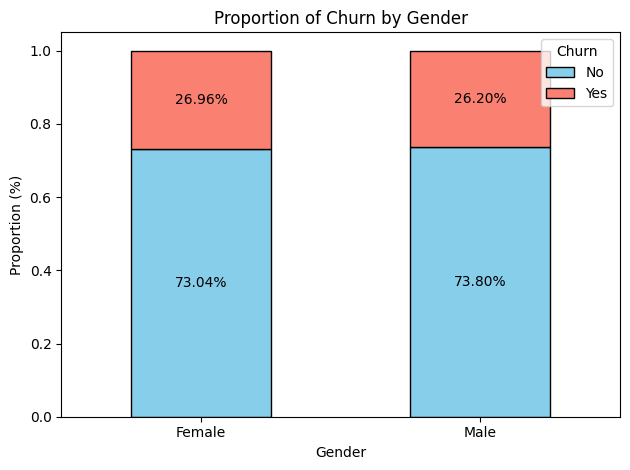

In [193]:

df = df.dropna(subset=['TotalCharges'])

# Plot barplot untuk churn_by_gender
plt.figure(figsize=(8, 6))
churn_by_gender.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

# Menambahkan label persentase pada setiap bar
for gender, row in enumerate(churn_by_gender.values):
    for index, value in enumerate(row):
        # Menampilkan persentase dengan dua angka desimal
        plt.text(gender, value / 2 + sum(row[:index]), f'{value * 100:.2f}%', 
                 ha='center', va='center', color='black', fontsize=10)

# Menambahkan judul dan label
plt.title("Proportion of Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion (%)")
plt.legend(title="Churn", loc='upper right')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### **Observasi** 
**Churn Berdasarkan Gender**:
   - Pelanggan perempuan memiliki tingkat churn sebesar 26.96%, sedangkan laki-laki sedikit lebih rendah yaitu 26.20%. Secara keseluruhan, perbedaan churn antara gender tidak terlalu signifikan.

-------------------------

### 2. **Apakah ada korelasi antara lamanya pelanggan berlangganan (tenure) dengan churn?**
   - Tujuan: Melihat hubungan antara durasi berlangganan dan kemungkinan pelanggan berhenti.

In [194]:
# tenure_churn = df.groupby('Churn')['tenure'].mean()
# tenure_churn

In [195]:
tenure_churn = (df
                .groupby('Churn')
                .agg(Avg_tenure=('tenure','mean'))
                .reset_index()
                )
tenure_churn

,Churn,Avg_tenure
0,No,37.650010
1,Yes,17.979133


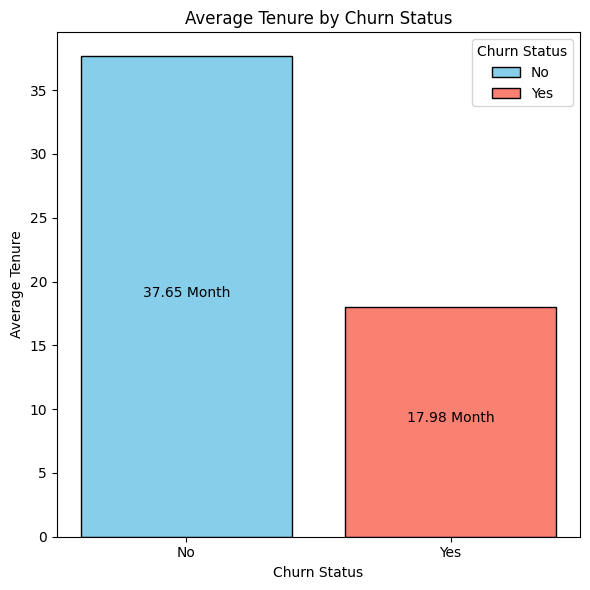

In [196]:
# # Plot barplot
# plt.figure(figsize=(8, 6))
# tenure_churn.plot(kind='bar', x='Churn', y='Avg_tenure', stacked=False, color=['skyblue', 'salmon'], edgecolor='black')

# # Menambahkan label value pada setiap bar
# for index, value in enumerate(tenure_churn['Avg_tenure']):
#     plt.text(index, value / 2, f'{value:.2f} Month', ha='center', va='center', color='black', fontsize=10)

# # Menambahkan judul dan label
# plt.title("Average Tenure by Churn Status")
# plt.xlabel("Churn Status")
# plt.ylabel("Average Tenure")
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()





# Plot the bar plot with separate colors and manual legend
plt.figure(figsize=(6, 6))

# Akses nilai tenure berdasarkan status churn
tenure_no = tenure_churn[tenure_churn['Churn'] == 'No']['Avg_tenure'].values[0]
tenure_yes = tenure_churn[tenure_churn['Churn'] == 'Yes']['Avg_tenure'].values[0]

# Buat bar plot dengan warna berbeda
bar1 = plt.bar('No', tenure_no, color='skyblue', edgecolor='black', label='No')
bar2 = plt.bar('Yes', tenure_yes, color='salmon', edgecolor='black', label='Yes')

# Tambahkan label nilai di setiap bar
plt.text('No', tenure_no / 2, f'{tenure_no:.2f} Month', ha='center', color='black', fontsize=10)
plt.text('Yes', tenure_yes / 2, f'{tenure_yes:.2f} Month', ha='center', color='black', fontsize=10)

# Judul dan label sumbu
plt.title("Average Tenure by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Average Tenure")

# Legend untuk kedua kategori
plt.legend(title="Churn Status", loc='upper right')

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()






### **Observasi**
**Hubungan Tenure dengan Churn**:
   - Rata-rata tenure pelanggan yang tidak churn adalah sekitar 37.65 bulan, sedangkan pelanggan yang churn hanya sekitar 17.98 bulan. Ini menunjukkan bahwa pelanggan yang bertahan lebih lama cenderung memiliki kemungkinan churn yang lebih rendah.

--------------------

### 3. **Bagaimana perbandingan churn berdasarkan metode pembayaran?**
   - Tujuan: Mengidentifikasi metode pembayaran yang mungkin berhubungan dengan churn lebih tinggi.

In [197]:
churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_payment

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


<Figure size 800x600 with 0 Axes>

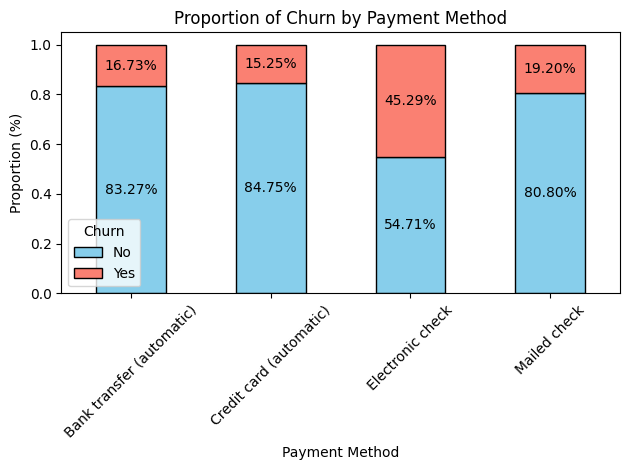

In [198]:
# Plot barplot untuk churn_by_payment
plt.figure(figsize=(8, 6))
churn_by_payment.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

# Menambahkan label persentase pada setiap bar dengan sedikit jarak agar tidak dempet
for gender, row in enumerate(churn_by_payment.values):
    for index, value in enumerate(row):
        # Menampilkan persentase dengan dua angka desimal, menyesuaikan posisi teks agar tidak terlalu dempet
        plt.text(gender, sum(row[:index]) + value / 2, f'{value * 100:.2f}%', 
                 ha='center', va='center', color='black', fontsize=10)

# Menambahkan judul dan label
plt.title("Proportion of Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Proportion (%)")
plt.legend(title="Churn", loc='lower left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



### **Observasi**
**Churn Berdasarkan Metode Pembayaran**:
   - Pelanggan dengan metode pembayaran "Electronic check" memiliki tingkat churn tertinggi sebesar 45.29%, dibandingkan dengan metode otomatis (Bank Transfer atau Credit Card) yang memiliki tingkat churn lebih rendah, masing-masing 16.73% dan 15.25%.

-----------------------------

### 4. **Berapa rata-rata pendapatan bulanan dari pelanggan yang churn dibandingkan dengan yang tidak churn? (menggunakan agregasi berkelompok)**
   - Tujuan: Menggunakan pengelompokan berdasarkan status churn untuk mengeksplorasi perbedaan rata-rata pendapatan bulanan.

In [199]:
monthly_charges_by_churn = (df
                            .groupby('Churn')
                            .agg(Avg_Monthly_Charges=('MonthlyCharges','mean'))
                            .reset_index()
                            )
monthly_charges_by_churn

,Churn,Avg_Monthly_Charges
0,No,61.307408
1,Yes,74.441332


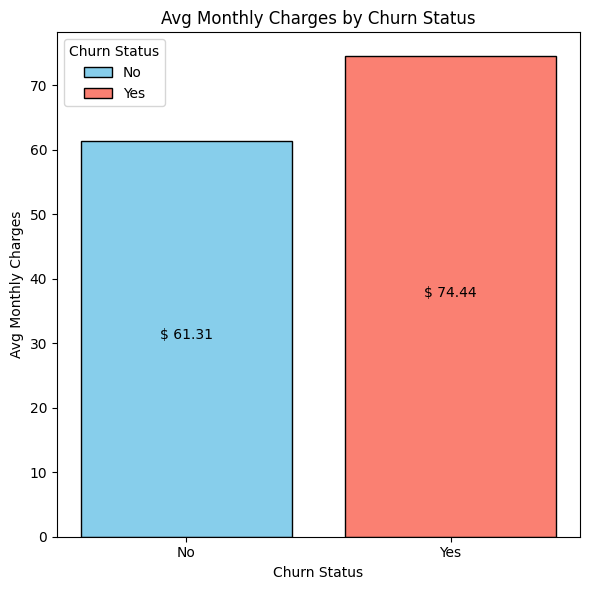

In [200]:
# # Plot barplot
# plt.figure(figsize=(8, 6))
# monthly_charges_by_churn.plot(kind='bar', x='Churn', y='Avg_Monthly_Charges', stacked=False, color=['skyblue', 'salmon'], edgecolor='black')

# # Menambahkan label value pada setiap bar
# for index, value in enumerate(monthly_charges_by_churn['Avg_Monthly_Charges']):
#     plt.text(index, value / 2, f'$ {value:.2f}', ha='center', va='center', color='black', fontsize=10)

# # Menambahkan judul dan label
# plt.title("Avg Monthly Charges Status")
# plt.xlabel("Churn Status")
# plt.ylabel("Avg Monthly Charges")
# plt.legend(title="Churn Status", labels=["No", "Yes"], loc='upper left')
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()
# Plot barplot untuk monthly_charges_by_churn
# Plot barplot untuk monthly_charges_by_churn





import matplotlib.pyplot as plt

# Plot the bar plot with separate colors and manual legend
plt.figure(figsize=(6, 6))

# Akses nilai tenure berdasarkan status churn
mcbc_no = monthly_charges_by_churn[monthly_charges_by_churn['Churn'] == 'No']['Avg_Monthly_Charges'].values[0]
mcbc_yes = monthly_charges_by_churn[monthly_charges_by_churn['Churn'] == 'Yes']['Avg_Monthly_Charges'].values[0]

# Buat bar plot dengan warna berbeda
bar1 = plt.bar('No', mcbc_no, color='skyblue', edgecolor='black', label='No')
bar2 = plt.bar('Yes', mcbc_yes, color='salmon', edgecolor='black', label='Yes')

# Adding value labels on each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'$ {yval:.2f}', ha='center', color='black', fontsize=10)

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'$ {yval:.2f}', ha='center', color='black', fontsize=10)

# Title and axis labels
plt.title("Avg Monthly Charges by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Avg Monthly Charges")

# Custom legend
plt.legend(title="Churn Status", loc='upper left')

# Ensure xticks alignment and show plot
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()




### **Observasi**
**Pendapatan Bulanan Rata-Rata Berdasarkan Status Churn**:
   - Pelanggan yang churn memiliki rata-rata pengeluaran bulanan sebesar $74.44, sedangkan yang tidak churn hanya $61.31. Ini menunjukkan bahwa pelanggan dengan pengeluaran bulanan lebih tinggi cenderung memiliki risiko churn lebih besar.

----------------------------

**Dari hasil observasi ini, dapat disimpulkan beberapa hal terkait perilaku churn pelanggan pada dataset yang dianalisis:**

1. **Gender Tidak Menjadi Faktor Utama dalam Churn**  
   Tingkat churn antara laki-laki dan perempuan hampir sama, yang menunjukkan bahwa gender bukanlah faktor yang signifikan dalam menentukan apakah seorang pelanggan akan churn atau tidak.

2. **Tenure yang Lebih Lama Mengurangi Risiko Churn**  
   Pelanggan yang telah berlangganan lebih lama (rata-rata 37.65 bulan) cenderung memiliki kemungkinan churn yang lebih rendah dibandingkan dengan pelanggan baru atau yang berlangganan lebih sebentar (rata-rata 17.98 bulan). Hal ini menunjukkan bahwa loyalitas pelanggan bertumbuh seiring waktu, dan semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka untuk churn.

3. **Metode Pembayaran Mempengaruhi Churn**  
   Pelanggan yang menggunakan metode pembayaran "Electronic check" memiliki risiko churn yang lebih tinggi dibandingkan metode pembayaran otomatis seperti "Bank Transfer" dan "Credit Card". Ini mungkin menunjukkan bahwa kemudahan dan otomatisasi dalam pembayaran dapat membantu mengurangi churn.

4. **Pengeluaran Bulanan yang Tinggi Berpotensi Memicu Churn**  
   Pelanggan yang churn cenderung memiliki pengeluaran bulanan yang lebih tinggi ($74.44) dibandingkan mereka yang tidak churn ($61.31). Hal ini dapat diartikan bahwa pelanggan dengan pengeluaran bulanan yang lebih tinggi mungkin merasa bahwa layanan yang mereka bayar kurang sepadan dengan biaya yang dikeluarkan atau mereka mungkin mencari layanan yang lebih hemat biaya.

### Rekomendasi:
- **Retention Program**: Fokus pada pelanggan baru dan mereka yang berlangganan dalam jangka waktu pendek untuk mengurangi churn sejak awal.
- **Penawaran Pembayaran Otomatis**: Promosikan metode pembayaran otomatis untuk mengurangi churn pada pelanggan yang menggunakan "Electronic check".
- **Analisis Biaya Layanan**: Pertimbangkan untuk mengevaluasi atau menawarkan paket harga yang sesuai bagi pelanggan dengan pengeluaran bulanan tinggi agar mereka merasa mendapat nilai lebih dari layanan.

**Kesimpulan ini dapat membantu perusahaan dalam membuat strategi pengurangan churn yang lebih efektif dan mempertahankan pelanggan untuk jangka panjang.**